### Project Team Id : PTID-CDS-FEB-24-1819

### Project Code : PRCP -1009

### Cellphone Price Prediction

## Business Case : To predict a price of Cellphone based on the given features.

### Importing Libraries

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Read the given dataset

In [2]:
# # loading the data
data=pd.read_csv(r"C:\Users\HP\Downloads\PRCP-1009-CellphonePrice\Data\datasets_11167_15520_train.csv")

In [3]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# Task 1:-Prepare a complete data analysis report on the given data.

# Basic Checks

In [4]:
data.shape

(2000, 21)

In [5]:
data.keys()

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

 * Insights:

 * There are 2000 rows & 21 columns
 
 * This is a Multi-class classification

# Exploratory Data Analysis

In [11]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

* Insights:
 * This is a numerical data all the datatypes of features are int and float datatype

In [13]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


 * Insights:
    * Here standard deviation is not 0 anywhere
    
     * There are no 0 values for ths feature

# Univariate Analysis

In [14]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                                                …

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


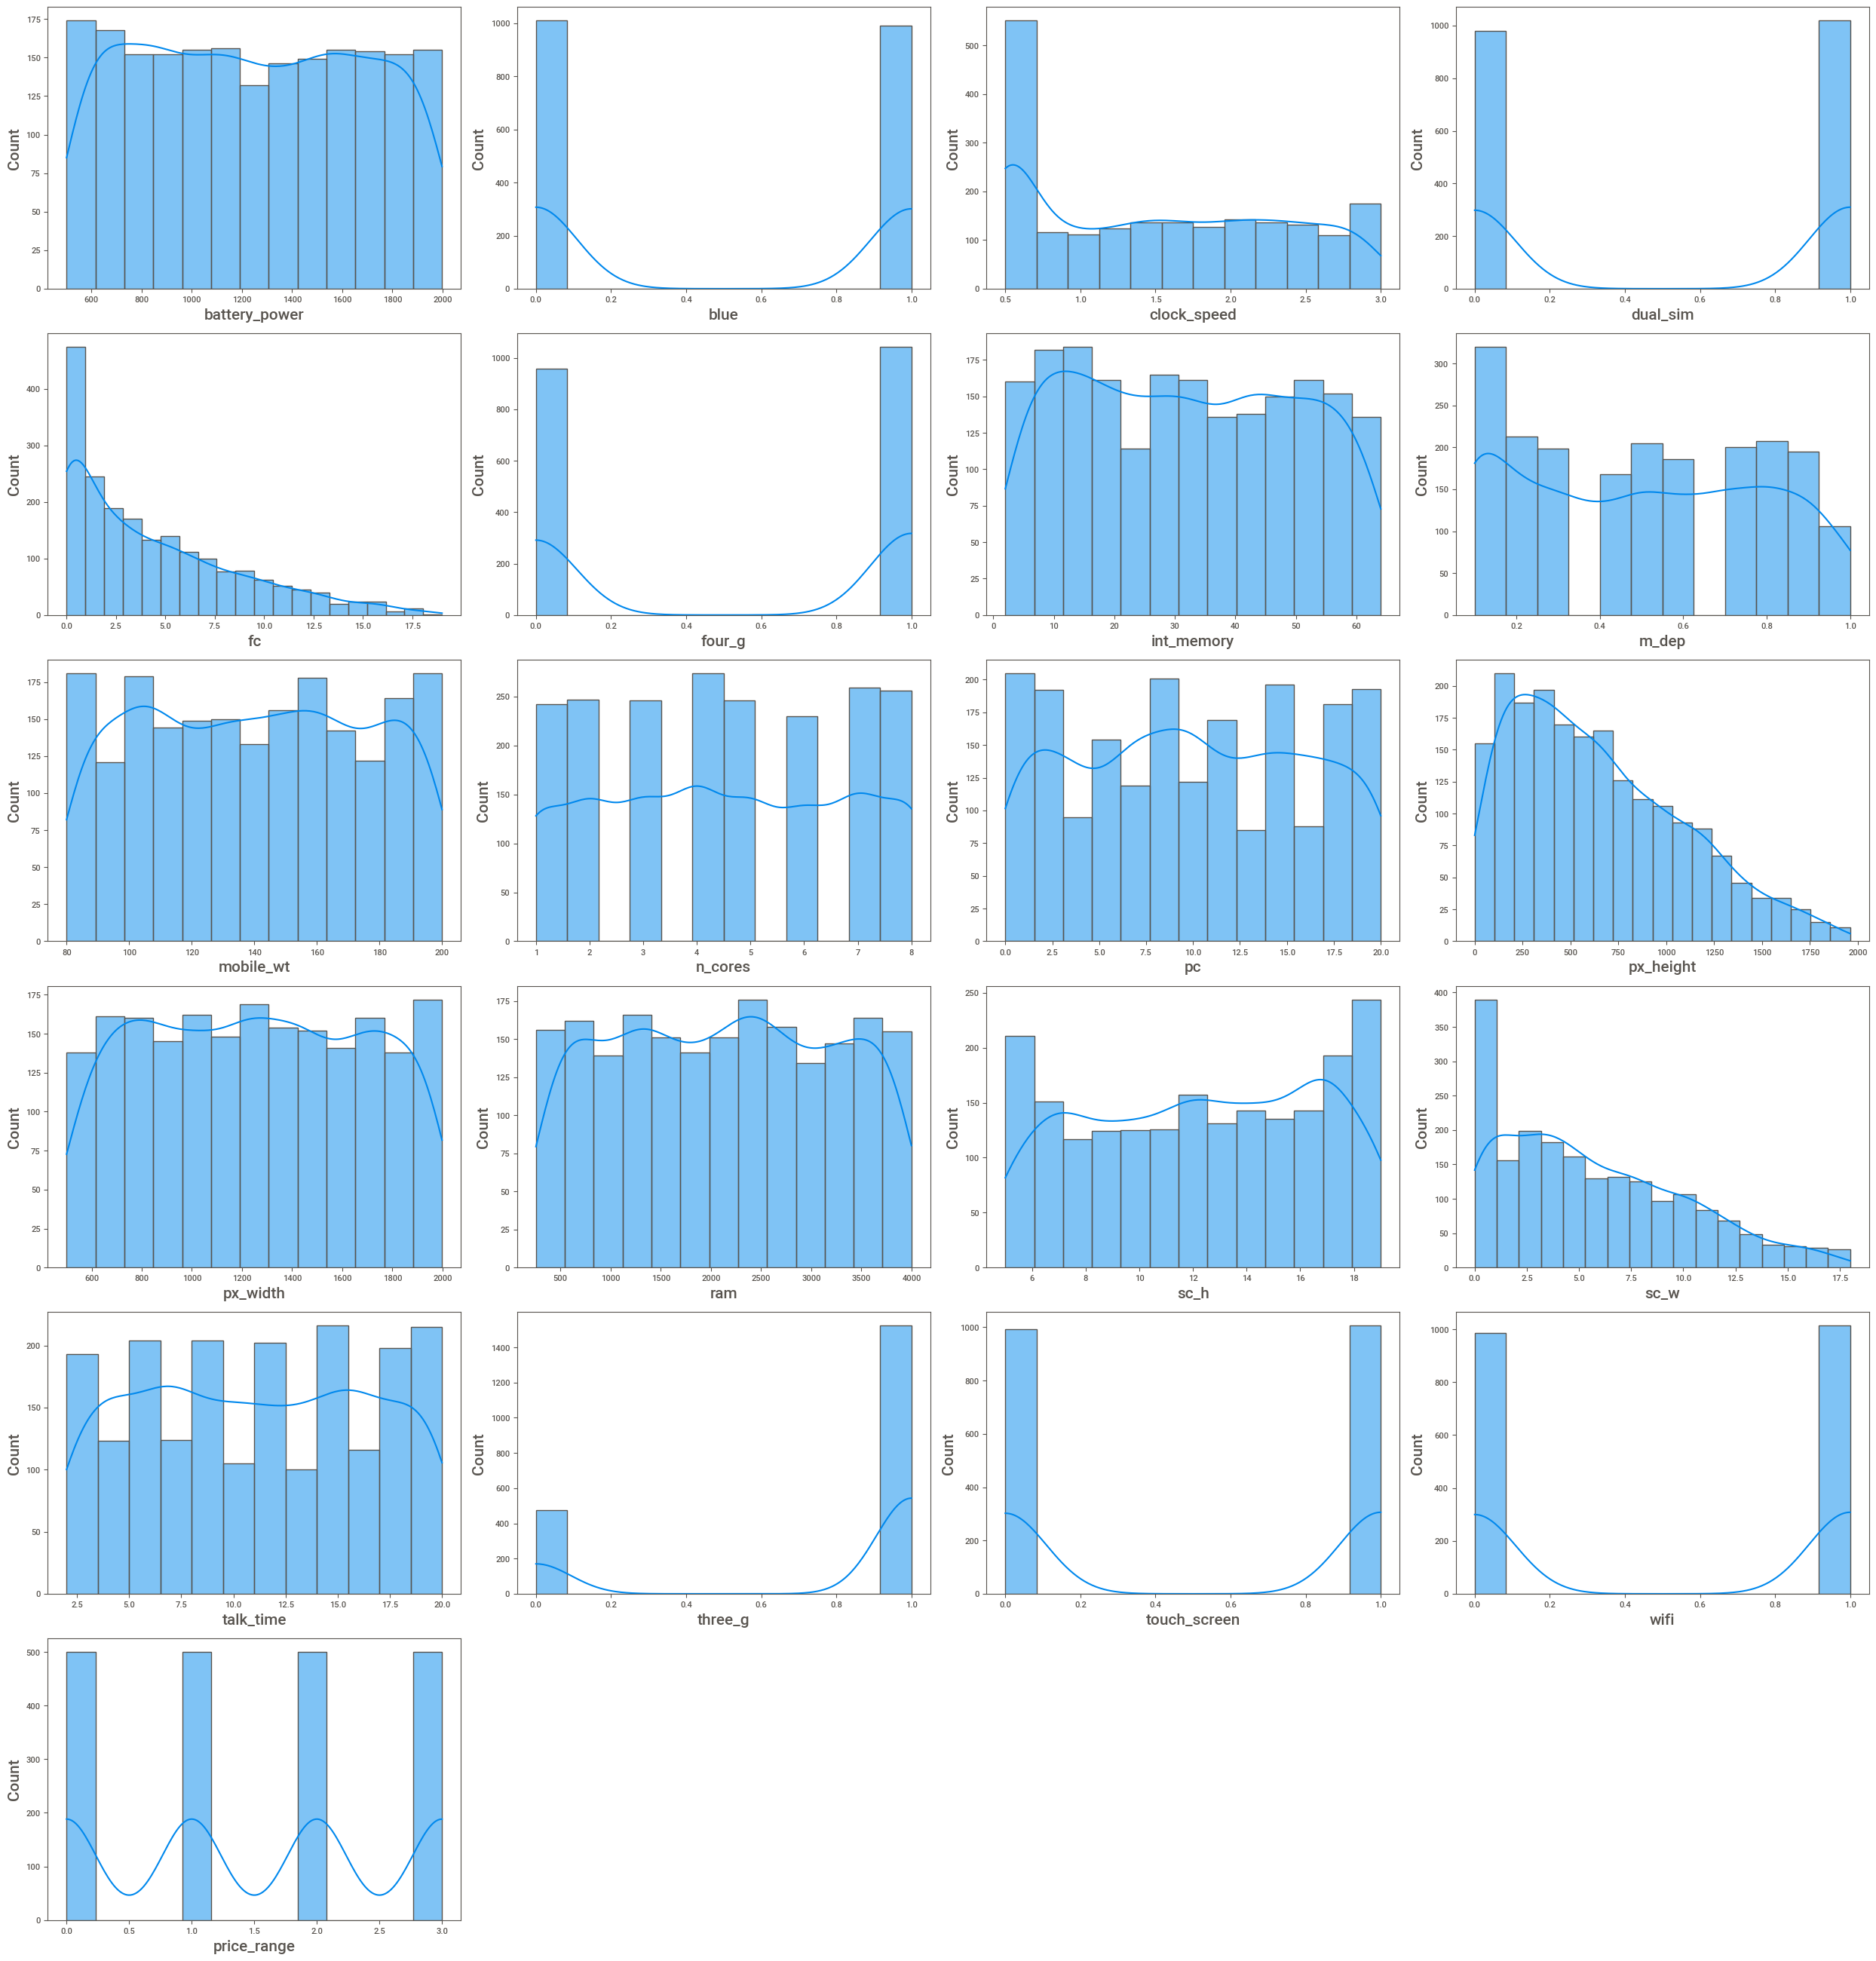

In [15]:
#Distribution check
plt.figure(figsize=(25,30))
plotnumber=1

for column in data:
    if plotnumber<22:
        ax=plt.subplot(7,4,plotnumber)
        sns.histplot(data=data,x=data[column],kde=True)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Count',fontsize=15)
    plotnumber+=1
plt.tight_layout()

1.There are many features have the distinct values which is 0 & 1

2.for battery_power total max energy is 1998 and min can store is 501 in mAh

3.for bluetooth there are most are the mobiles does not(0) have the bluetooth actually it's a 50%(yes) - 50%(not)

4.for dual_sim there are max supports(1) the dual sims

5.front camera is completely in right skewed form

6.for 4g most of are the 4g(1)

7.Internal memory is max 64.0 and min 2.0

8.mobile weight is max 200 and min 80

9.pixel camera is max 20.0, height and weight is max nearly 2k

10.ram is max 3998 and min 256 which is good

11.talk time is max 20.0 will last

12.for 3g yes(1) max its 3g

13.for touch screen its 50%(yes) - 50%(no)

14.max mobiles have(1) wifi

15.for price range which is target variable, 0(low cost)-25%, 1(medium cost)=25%, 2(high cost)=25% and 3(very high cost)=25%.

 * Here we will convert float datatype as int.

In [16]:
data['m_dep'] = data['m_dep'].astype('int64')

In [17]:
data['clock_speed'] = data['clock_speed'].astype('int64')

# Bivariate Analysis

 * Here we will find unique value in each column using for loop.

In [18]:
for i in data.columns:
    print('column :',i)
    print(data[i].unique())
    print('********************')

column : battery_power
[ 842 1021  563 ... 1139 1467  858]
********************
column : blue
[0 1]
********************
column : clock_speed
[2 0 1 3]
********************
column : dual_sim
[0 1]
********************
column : fc
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
********************
column : four_g
[0 1]
********************
column : int_memory
[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
********************
column : m_dep
[0 1]
********************
column : mobile_wt
[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 

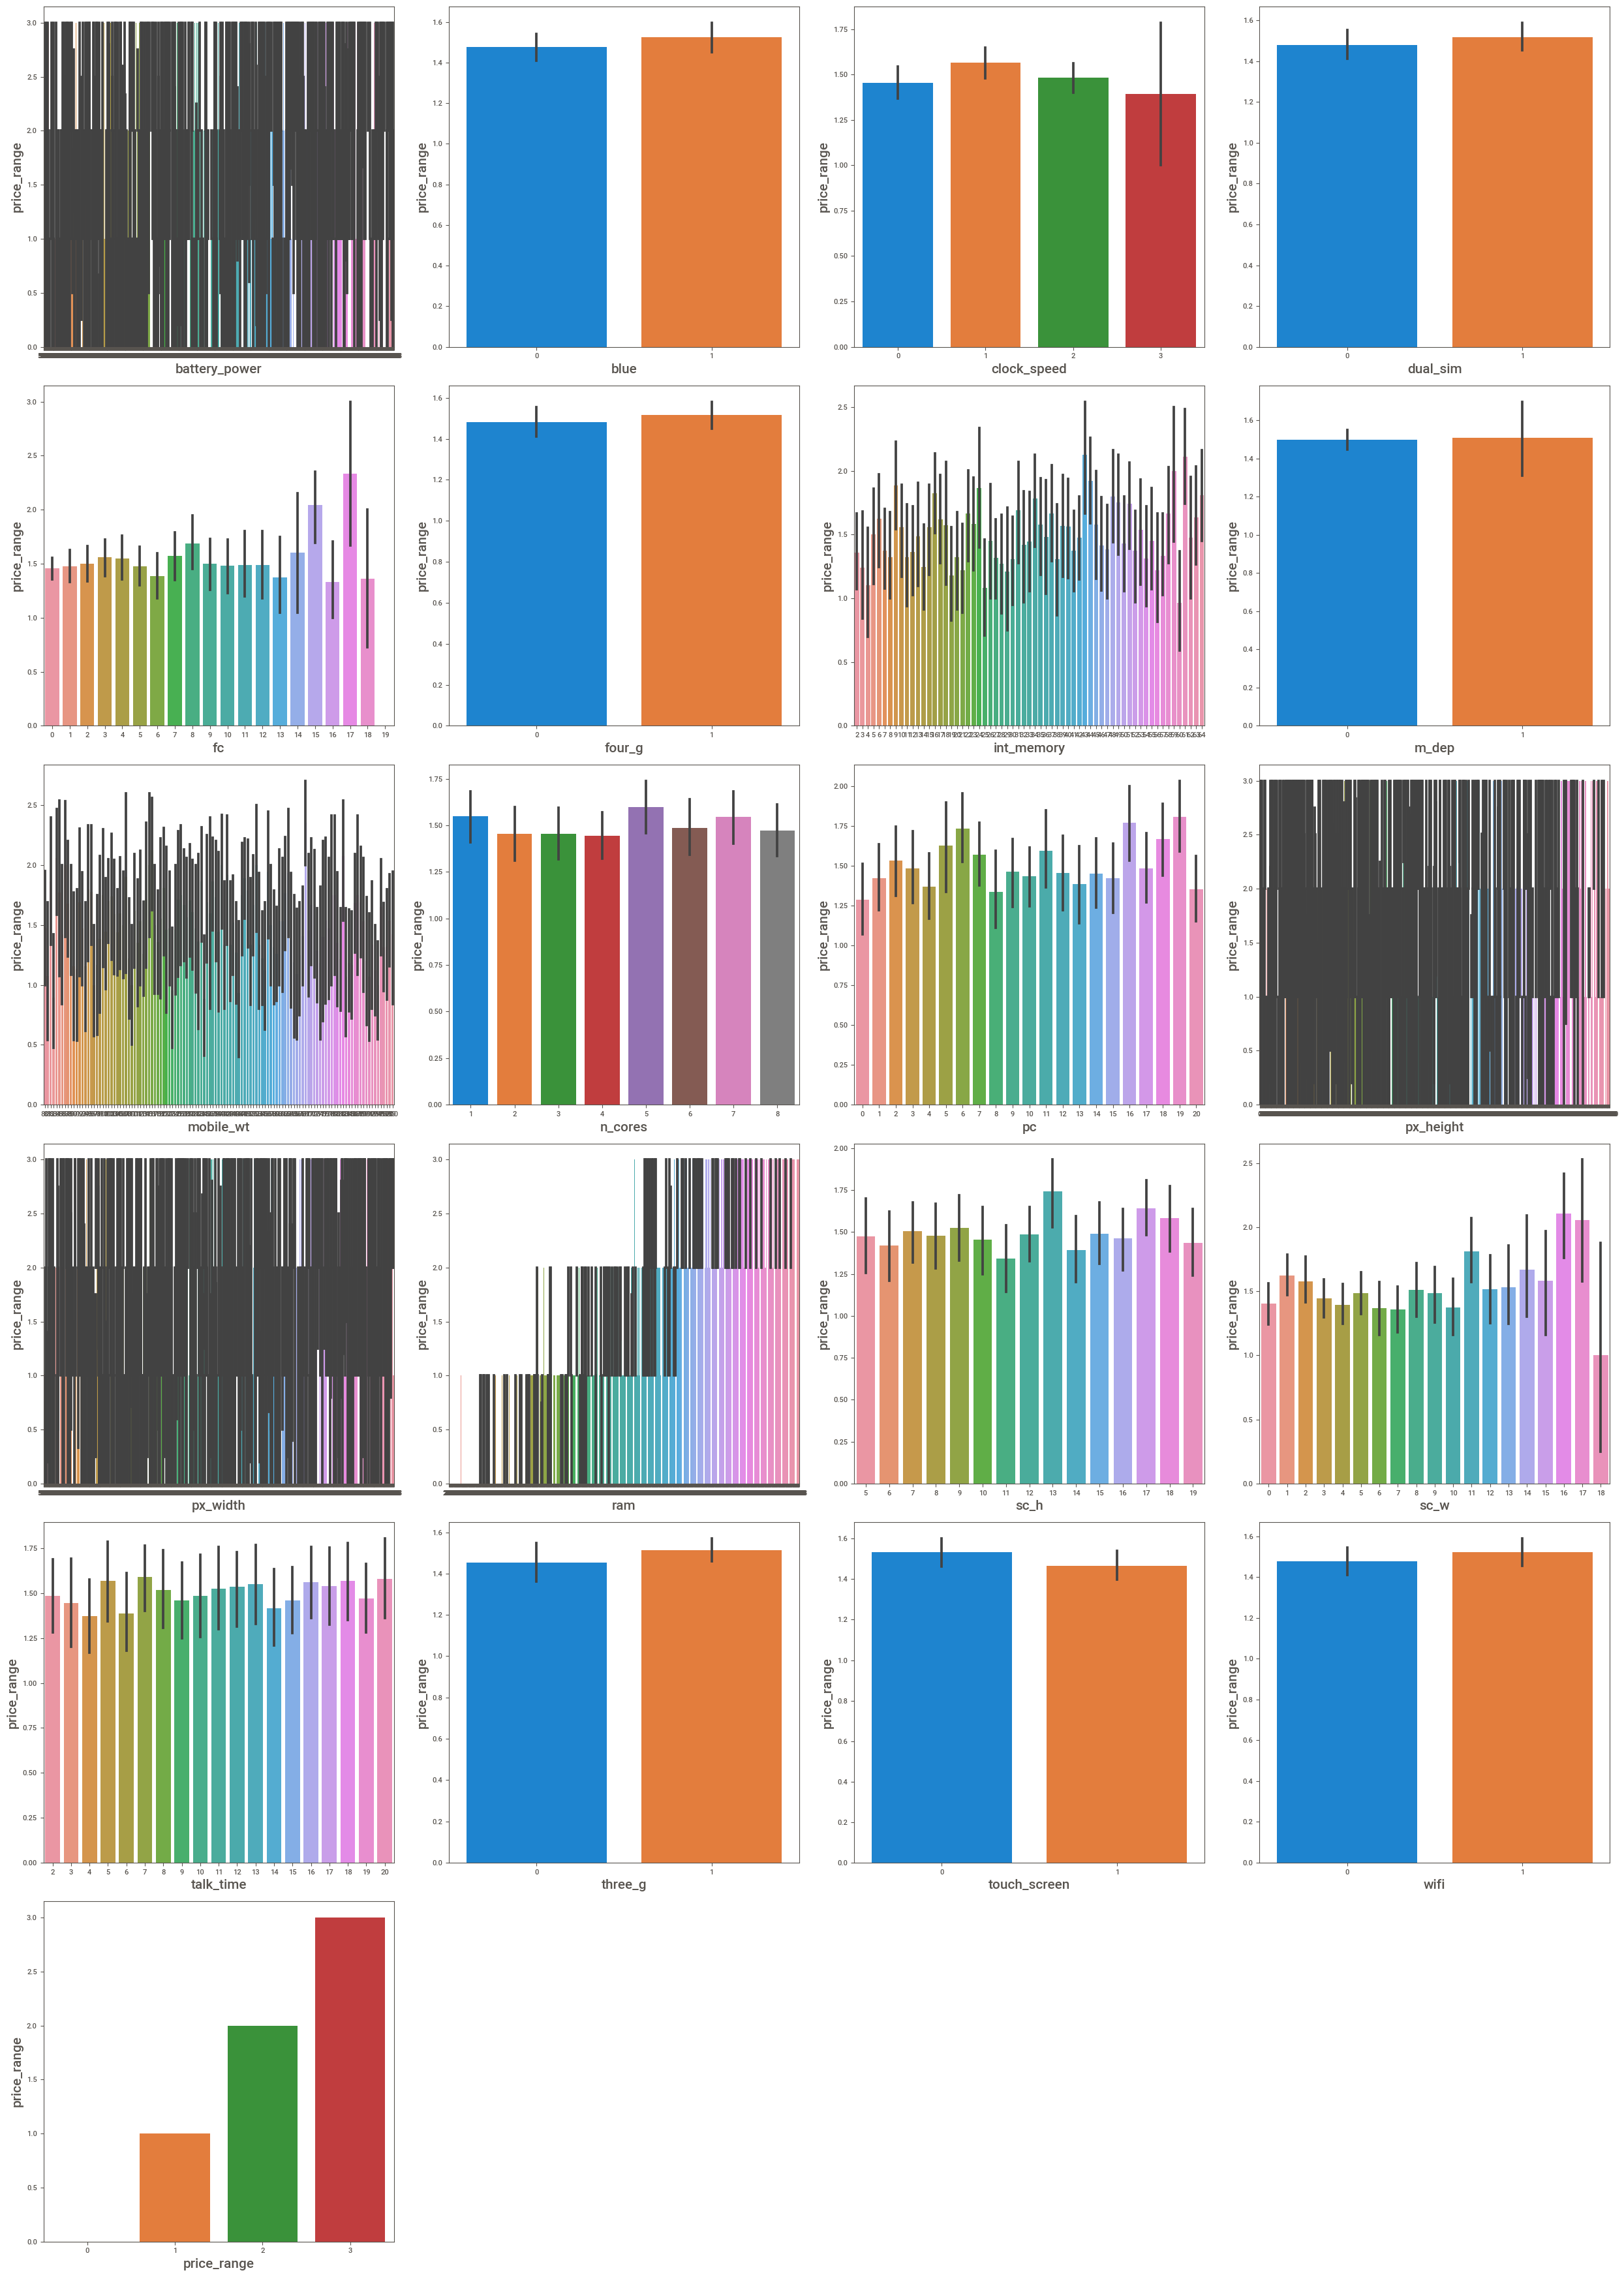

In [19]:
plt.figure(figsize=(25,35))
plotnumber=1

for column in data:
    if plotnumber<22:
        ax=plt.subplot(6,4,plotnumber)
        sns.barplot(data=data,x=column,y='price_range')
        plt.xlabel(column,fontsize=15)
        plt.ylabel('price_range',fontsize=15)
    plotnumber+=1
plt.tight_layout()

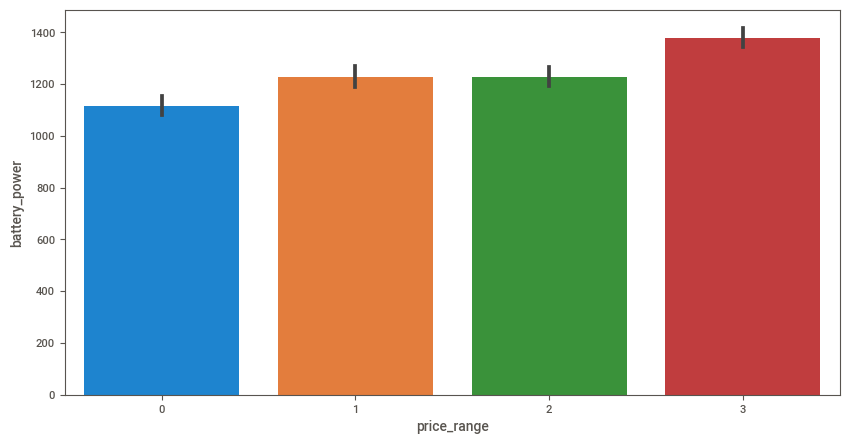

In [20]:
#relation between price_range & battery_power
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='price_range',y='battery_power')
plt.show()

 * Insights:

 * price_range 3 has the good battery_power, we can say that they are costlier having a max battery_power.

 * price_range 0 has lower battery_power as compare to others

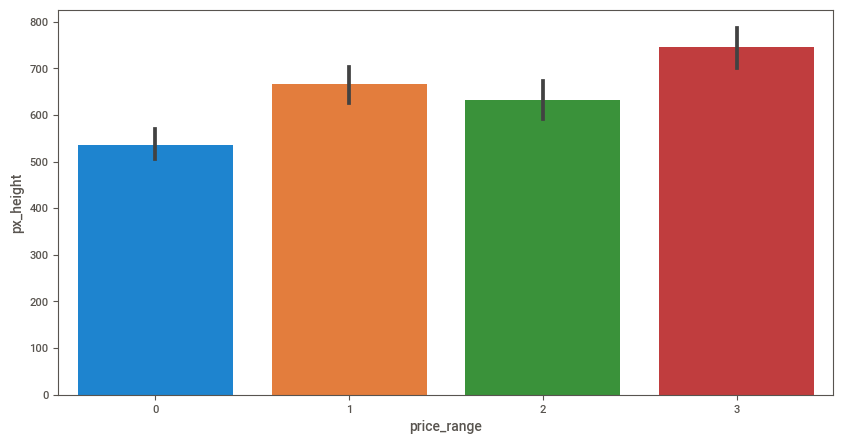

In [21]:
#relation between price_range and pixel height
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='price_range',y='px_height')
plt.show()

 * Insights:
    
 * pixel_height above the 700 having price_range more

 * price_range 0 having the lower px_height which is below 550

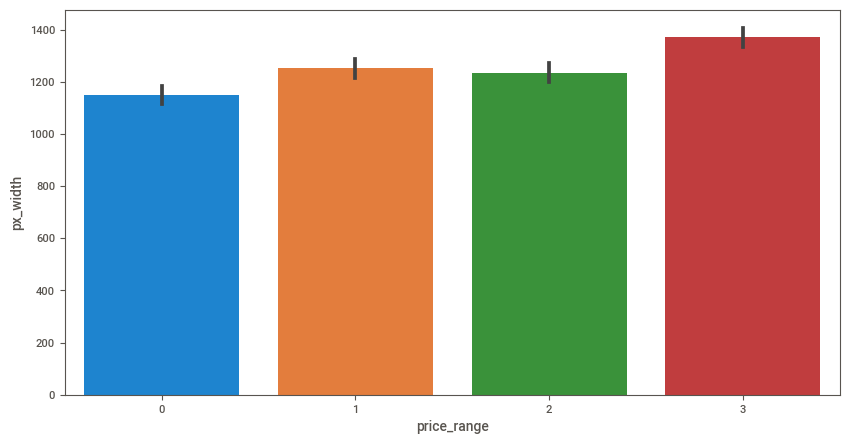

In [22]:
#relation between price_range and pixel width
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='price_range',y='px_width')
plt.show()

 * Insights:
    
 * the max px_width have the more price_range

 * and below 1200 px_width have the 0 price_range

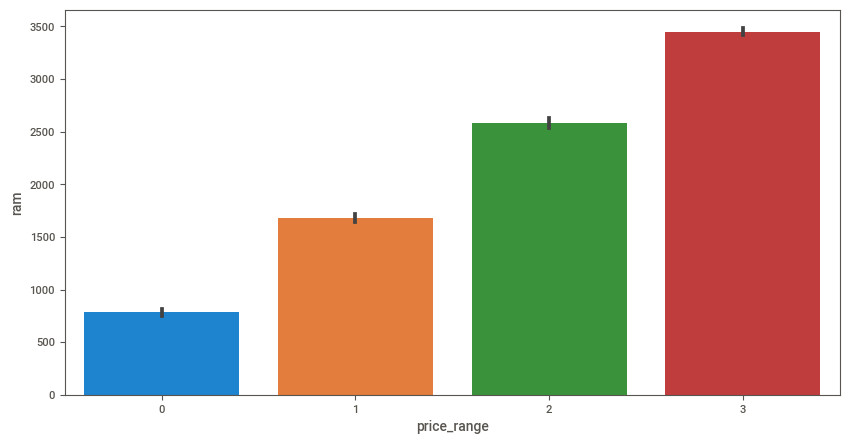

In [23]:
#relation between price_range and ram
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='price_range',y='ram')
plt.show()


 * Insights:
    
 * price_range 3 has the highest ram and below ram 800 has the lowest price_range

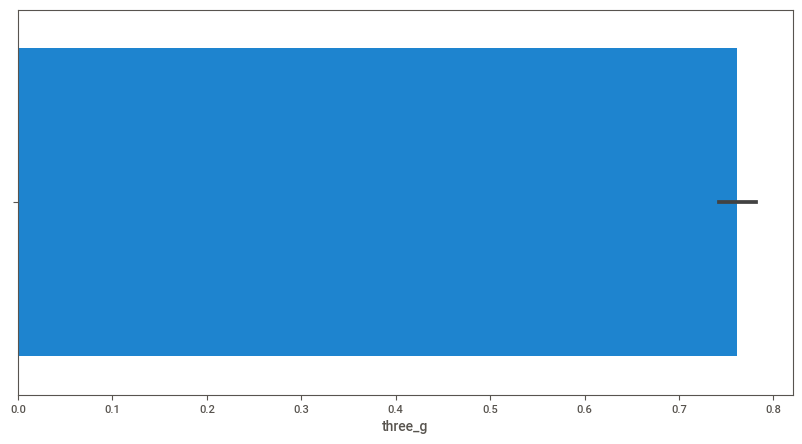

In [24]:
#relation between price_range and three_g
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='three_g',hue='price_range')
plt.show()


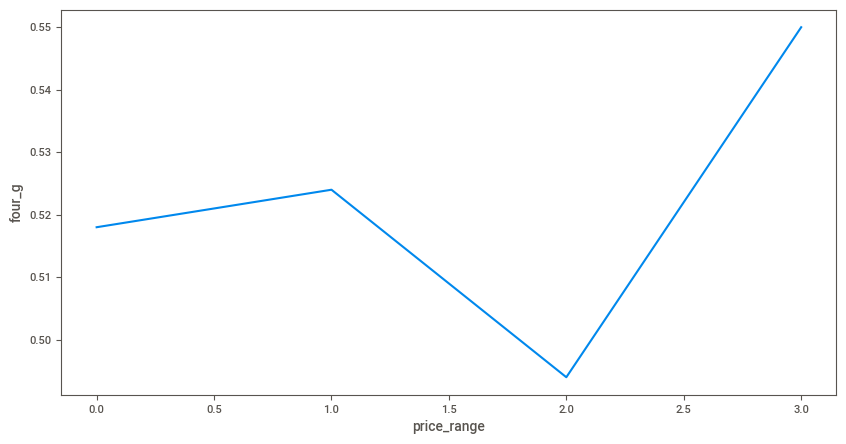

In [25]:
#relation between price_range and 3g
plt.figure(figsize=(10,5))
sns.lineplot(data=data,x='price_range',y="four_g",ci=None)
plt.show()

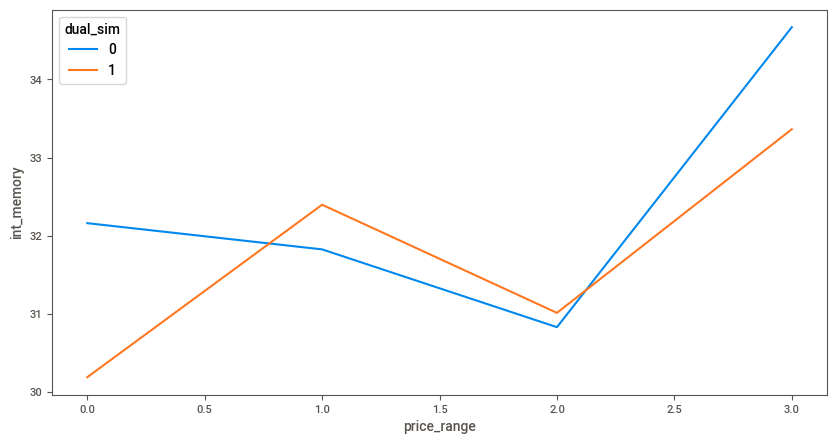

In [26]:
#relation between price range and memory
plt.figure(figsize=(10,5))
sns.lineplot(data=data,x='price_range',y="int_memory",hue='dual_sim',ci=None)
plt.show()

 * Insights:
    
 * mobiles does not(0) having mobile dual_sims have good int_memory and there price_range is also more

 * mobiles having(1) dual_sims have bad int_memory but there price_range is also in 3rd category

# Data Preprocessing & Feature Engg

In [27]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

 * Insights:
    
 * There is no features having the null values

*  Here we will check outliers by using boxplot.  

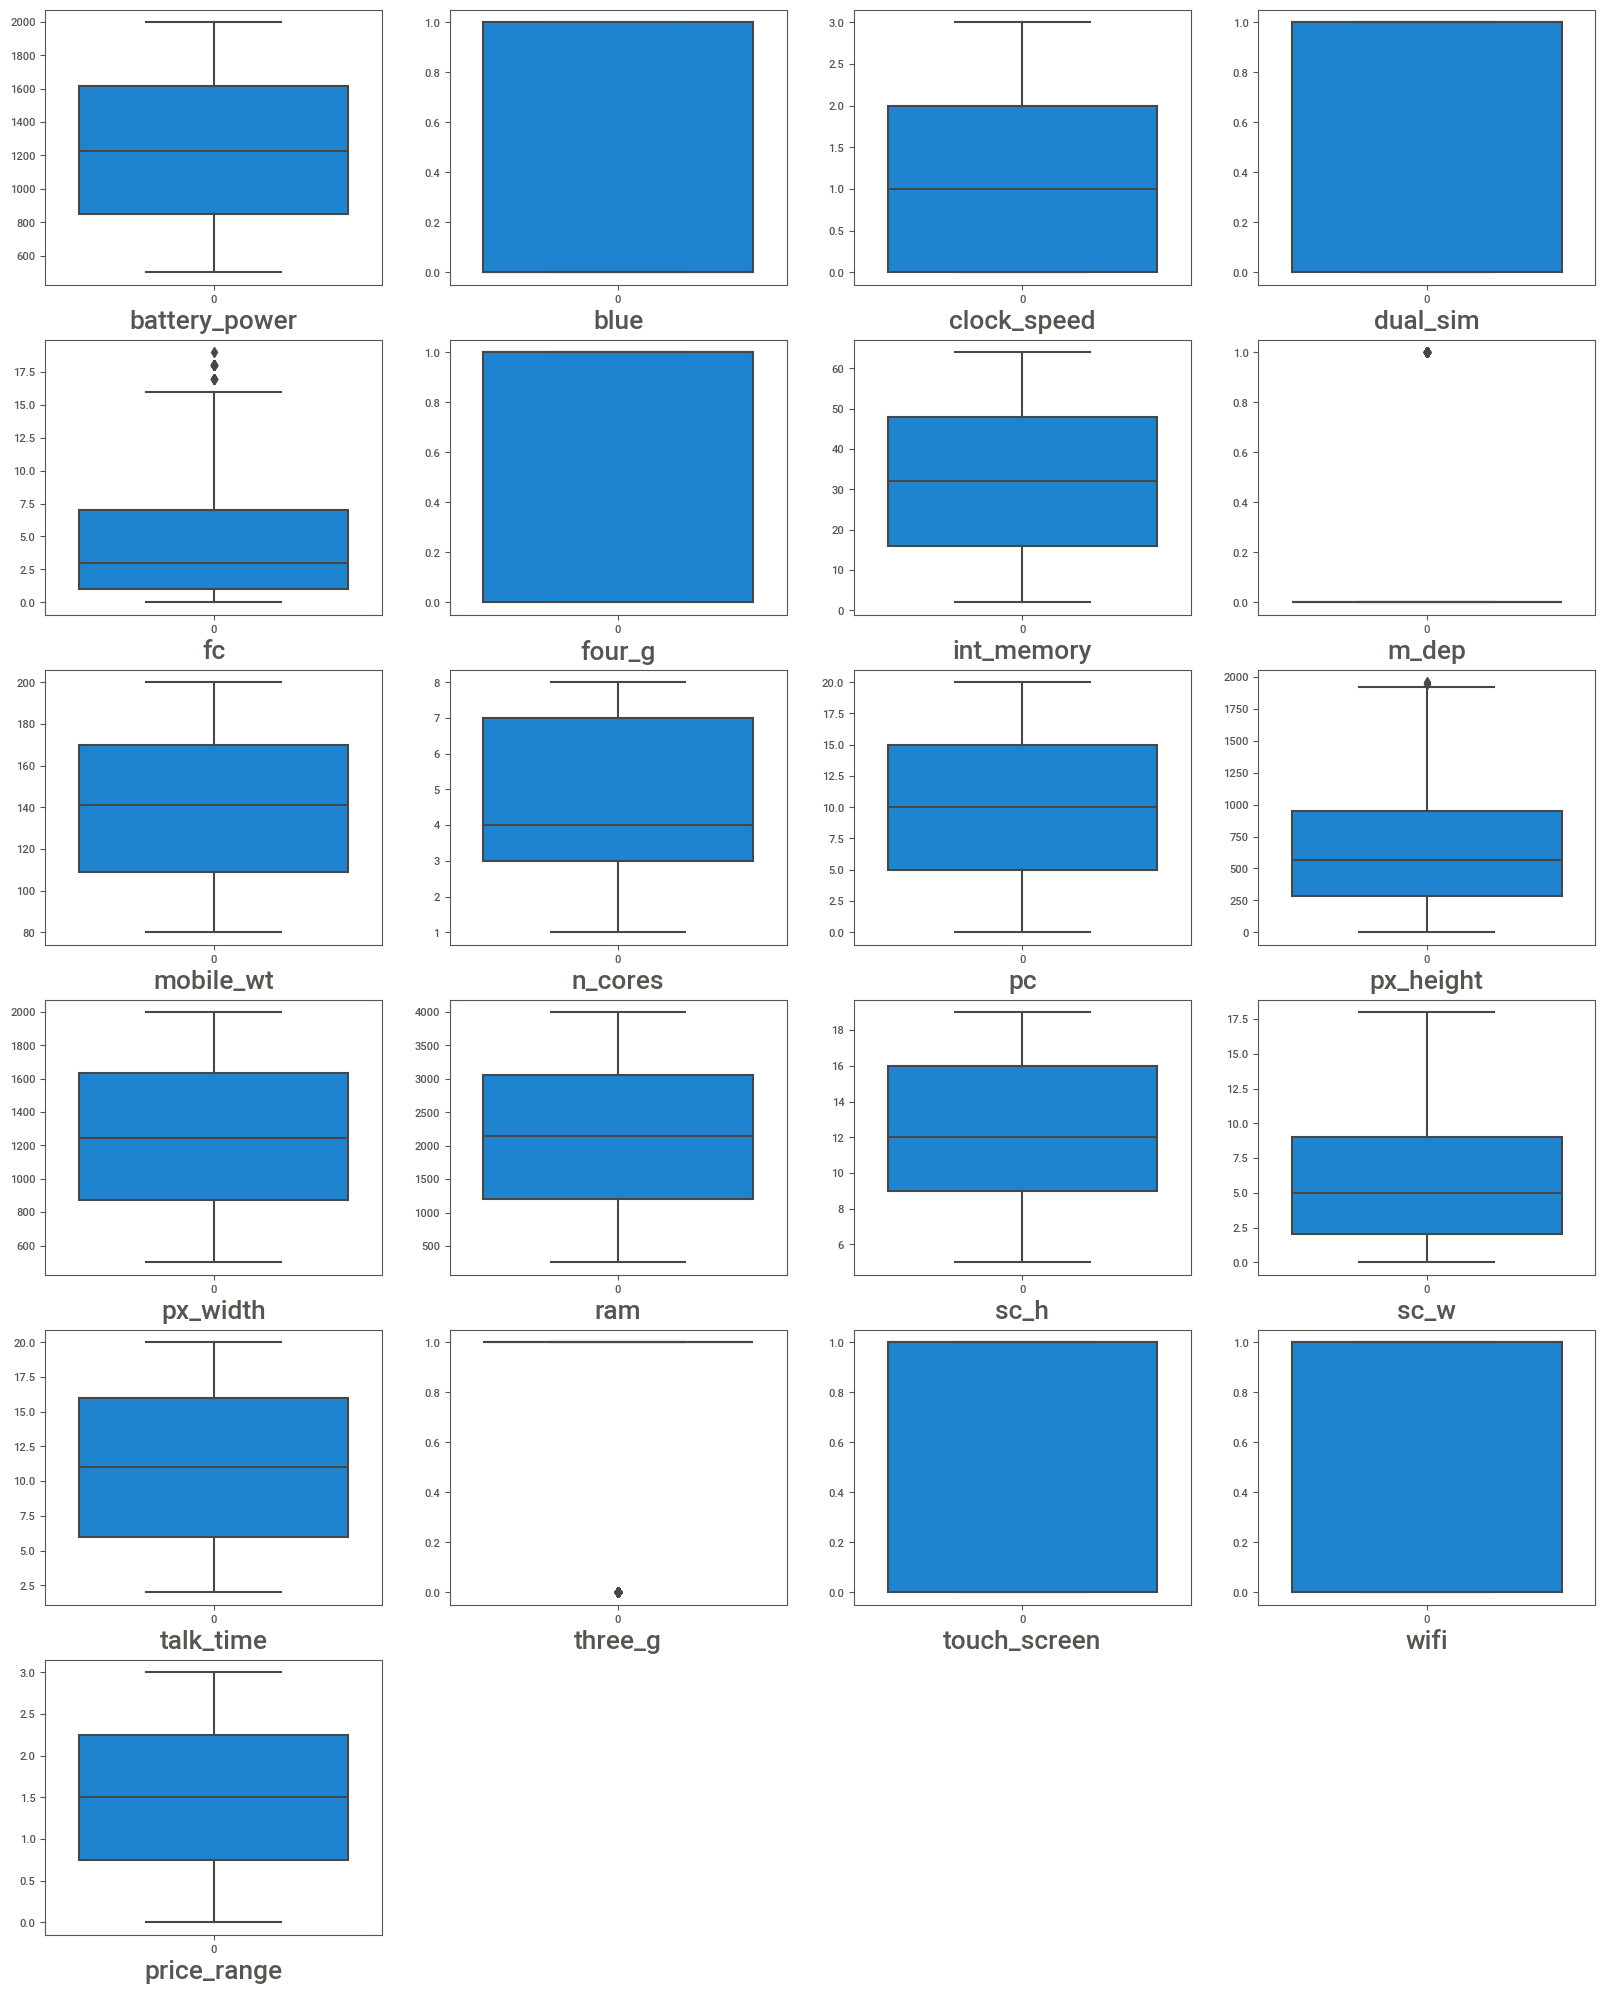

In [28]:
#checking outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber= 1
for column in data:
    if plotnumber<=22:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=19)
    plotnumber+=1
plt.show()
            

 * Insights:
    
 * There are 3 outliers in fc

 * 1 outlier in three_g

 * 1 outlier in px_height

 ### Handeling outliers 

 * Here we will handel outliers by using IQR

<Axes: xlabel='three_g'>

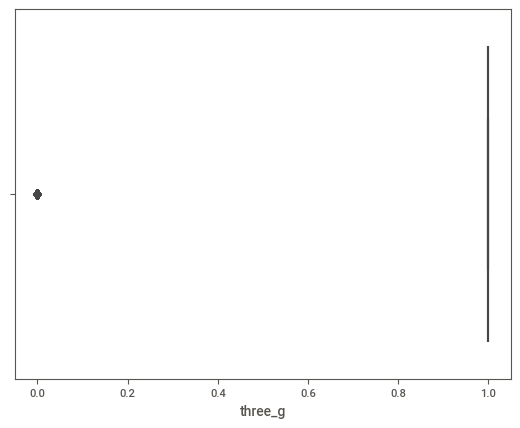

In [29]:
sns.boxplot(data=data,x='three_g')

In [30]:
q1=data['three_g'].quantile(0.25)
q3=data['three_g'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*IQR
UL=q3+1.5*IQR
print(q1)
print(q3)
print(IQR)
print(LL)
print(UL)


1.0
1.0
0.0
1.0
1.0


In [31]:
data.loc[data['three_g'] < 1 ,'three_g'] = np.median(data['three_g'])

<Axes: xlabel='three_g'>

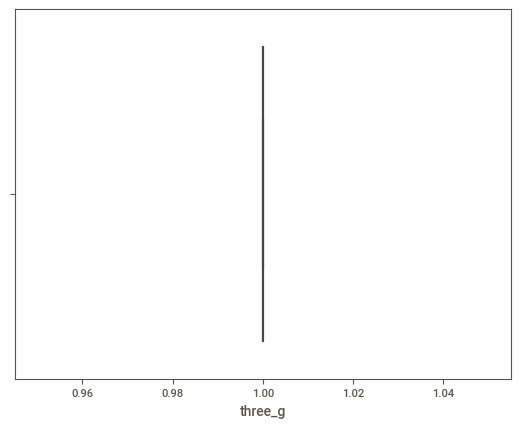

In [32]:
sns.boxplot(data=data,x='three_g')

<Axes: xlabel='fc'>

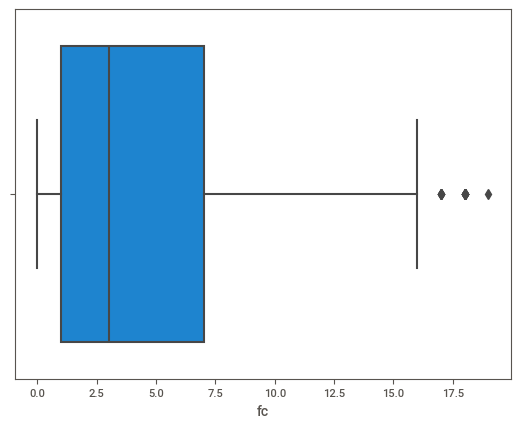

In [33]:
sns.boxplot(data=data,x='fc')

In [34]:
q1=data['fc'].quantile(0.25)
q3=data['fc'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*IQR
UL=q3+1.5*IQR
print(q1)
print(q3)
print(IQR)
print(LL)
print(UL)


1.0
7.0
6.0
-8.0
16.0


In [35]:
data.loc[data['fc'] > 16 ,'fc'] = np.median(data['fc'])

<Axes: xlabel='fc'>

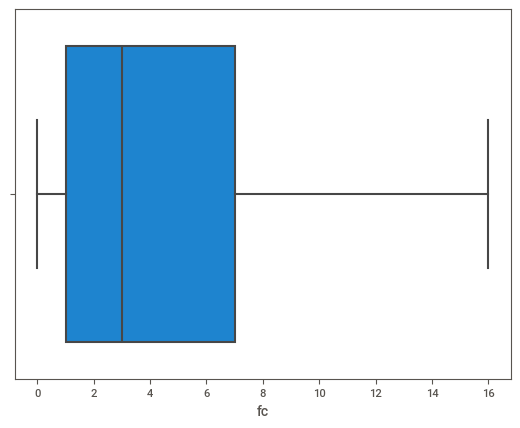

In [36]:
sns.boxplot(data=data,x='fc')

<Axes: xlabel='px_height'>

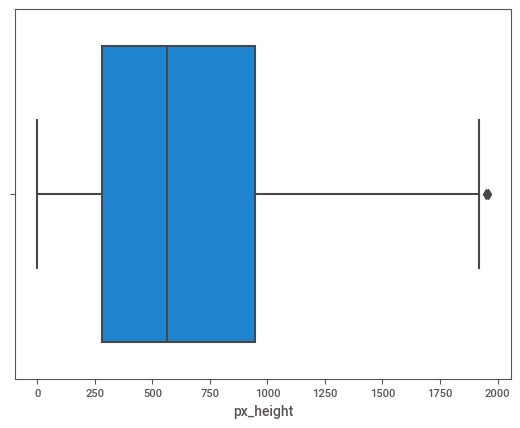

In [37]:
sns.boxplot(data=data,x='px_height'  )

In [38]:
q1=data['px_height'].quantile(0.25)
q3=data['px_height'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*IQR
UL=q3+1.5*IQR
print(q1)
print(q3)
print(IQR)
print(LL)
print(UL)

282.75
947.25
664.5
-714.0
1944.0


In [39]:
data.loc[data['px_height'] > 1944 ,'px_height'] = np.median(data['px_height'])

<Axes: xlabel='px_height'>

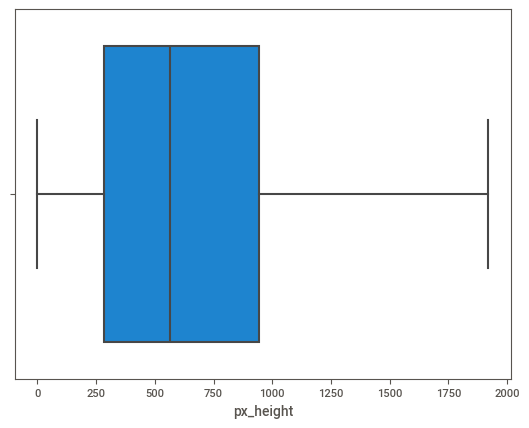

In [40]:
sns.boxplot(data=data,x='px_height')

 * we can see here handle all the outliers in three_g and fc and px_height

 * Here we will check the corelation 

<Axes: >

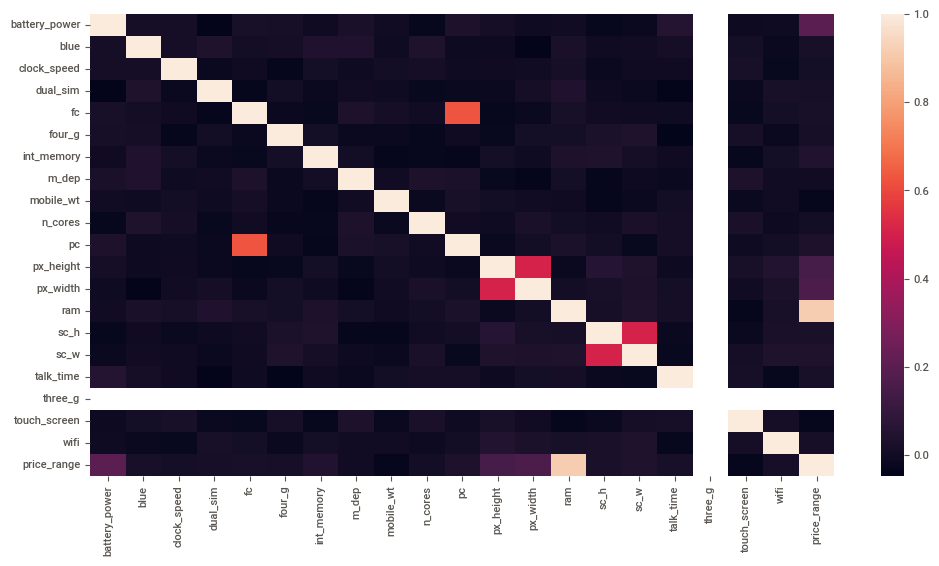

In [41]:
#checking the corelation 
plt.figure(figsize=(12,6))
sns.heatmap(data.corr())

 * Insights:
    
 * Here pc vs fc have high correlation

In [42]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011113,-0.041847,0.018896,0.015665,-0.004004,0.023847,0.001844,-0.029727,...,0.014374,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,NaN,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.013277,0.035198,0.003560,0.013443,0.041177,0.042540,-0.008605,0.036161,...,-0.010082,-0.041533,0.026351,-0.002952,0.000613,0.013934,NaN,0.010061,-0.021863,0.020573
clock_speed,0.011113,0.013277,1.000000,-0.014762,-0.005139,-0.033247,0.007011,-0.008068,0.003349,0.014090,...,-0.002323,0.000046,0.015202,-0.019511,-0.002766,-0.004805,NaN,0.022139,-0.022822,0.006837
dual_sim,-0.041847,0.035198,-0.014762,1.000000,-0.033595,0.003187,-0.015679,-0.000031,-0.008979,-0.024658,...,-0.020894,0.014291,0.041072,-0.011949,-0.016666,-0.039404,NaN,-0.017117,0.022740,0.017444
fc,0.018896,0.003560,-0.005139,-0.033595,1.000000,-0.019929,-0.025671,0.031865,0.013453,-0.001489,...,-0.029087,-0.014033,0.019830,0.000701,-0.002200,-0.008712,NaN,-0.025563,0.010491,0.020479
four_g,0.015665,0.013443,-0.033247,0.003187,-0.019929,1.000000,0.008690,-0.014650,-0.016537,-0.029706,...,-0.022336,0.007448,0.007313,0.027166,0.037005,-0.046628,NaN,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.007011,-0.015679,-0.025671,0.008690,1.000000,0.005176,-0.034214,-0.028310,...,0.007978,-0.008335,0.032813,0.037771,0.011731,-0.002790,NaN,-0.026999,0.006993,0.044435
m_dep,0.023847,0.042540,-0.008068,-0.000031,0.031865,-0.014650,0.005176,1.000000,0.002056,0.031055,...,-0.024605,-0.034382,0.007241,-0.034169,-0.012453,-0.014776,NaN,0.034290,0.001152,0.001996
mobile_wt,0.001844,-0.008605,0.003349,-0.008979,0.013453,-0.016537,-0.034214,0.002056,1.000000,-0.018989,...,0.003855,0.000090,-0.002581,-0.033855,-0.020761,0.006209,NaN,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,0.014090,-0.024658,-0.001489,-0.029706,-0.028310,0.031055,-0.018989,1.000000,...,-0.008944,0.024480,0.004868,-0.000315,0.025826,0.013148,NaN,0.023774,-0.009964,0.004399


 * Here we can see correlation between each column.

###  Splitting data

In [43]:
x = data.drop(columns = ['price_range']) #independant variable
y = data['price_range'] #dependant variable 
y.shape
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2,0,1,0,7,0,188,2,2,20,756,2549,9,7,19,1,0,1
1,1021,1,0,1,0,1,53,0,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0,1,2,1,41,0,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2,0,0,0,10,0,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1,0,13,1,44,0,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0,1,0,1,2,0,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2,1,0,0,39,0,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0,1,1,1,36,0,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0,0,4,1,46,0,145,5,5,336,670,869,18,10,19,1,1,1


In [44]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

### Scaling  data

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [46]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score

In [47]:
sc.fit_transform(x_train,y_train)

array([[-0.90893609,  1.01149463, -1.24781564, ...,  0.        ,
        -0.98722446,  0.98159786],
       [ 0.42822183,  1.01149463,  1.11771164, ...,  0.        ,
        -0.98722446, -1.01874713],
       [-0.84784765,  1.01149463, -0.065052  , ...,  0.        ,
         1.01294087,  0.98159786],
       ...,
       [-0.10121125, -0.98863599,  1.11771164, ...,  0.        ,
        -0.98722446,  0.98159786],
       [-0.09894872, -0.98863599,  1.11771164, ...,  0.        ,
         1.01294087,  0.98159786],
       [-1.19627797, -0.98863599, -1.24781564, ...,  0.        ,
        -0.98722446,  0.98159786]])

# Model Creation

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [49]:
lr.score(x_test,y_test)

0.6366666666666667

In [50]:
y_pred1 = lr.predict(x_test)
y_pred1

array([3, 0, 2, 1, 3, 0, 0, 2, 2, 2, 1, 3, 1, 1, 2, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 2, 0, 1, 1, 2, 3, 0, 0, 3, 2, 3, 3, 3, 3,
       2, 2, 0, 1, 3, 1, 0, 2, 0, 3, 0, 3, 3, 1, 0, 3, 3, 2, 2, 1, 1, 3,
       3, 3, 2, 2, 3, 2, 1, 0, 1, 3, 3, 1, 1, 1, 3, 1, 3, 0, 0, 0, 1, 0,
       1, 3, 1, 2, 1, 0, 0, 3, 2, 3, 0, 2, 1, 2, 2, 0, 3, 2, 3, 2, 3, 3,
       2, 0, 0, 2, 3, 3, 1, 0, 1, 0, 0, 3, 2, 2, 1, 2, 0, 0, 0, 3, 1, 3,
       3, 2, 3, 3, 3, 3, 0, 1, 1, 3, 2, 3, 1, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 1, 2, 2, 1, 3, 3, 3, 3, 0, 1, 3, 2, 1, 3, 3, 0,
       1, 1, 3, 0, 3, 1, 0, 1, 2, 1, 2, 0, 3, 3, 2, 3, 1, 1, 2, 1, 0, 3,
       2, 0, 3, 3, 3, 0, 1, 3, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2,
       2, 3, 0, 0, 3, 3, 2, 2, 0, 3, 1, 0, 0, 3, 2, 0, 2, 2, 0, 0, 0, 3,
       3, 2, 0, 0, 2, 3, 3, 1, 3, 0, 2, 1, 1, 0, 1, 2, 3, 2, 0, 0, 1, 3,
       3, 3, 2, 3, 3, 2, 1, 2, 2, 2, 1, 3, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0,
       1, 3, 3, 3, 0, 1, 2, 0, 2, 2, 3, 0, 1, 0, 1,

In [51]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       151
           1       0.53      0.55      0.54       135
           2       0.45      0.42      0.44       151
           3       0.70      0.73      0.71       163

    accuracy                           0.64       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.63      0.64      0.64       600



# knn

In [52]:
from sklearn.neighbors import  KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [53]:
knn.score(x_test,y_test)

0.935

In [54]:
y_pred2 = knn.predict(x_test)
y_pred2

array([3, 0, 2, 2, 2, 0, 0, 2, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 1, 2, 3, 3, 3, 0, 0, 0, 2, 0,
       2, 3, 1, 2, 2, 1, 0, 3, 2, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 2, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 2, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 0, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 3, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [55]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       151
           1       0.94      0.90      0.92       135
           2       0.91      0.91      0.91       151
           3       0.96      0.93      0.94       163

    accuracy                           0.94       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.94      0.94      0.93       600



# SVC

In [56]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(x_train,y_train)
y_pred3 = svc.predict(x_test)

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [58]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=0.001, kernel='poly')


In [59]:
grid_pred = grid.predict(x_test)

In [60]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       151
           1       0.95      0.93      0.94       135
           2       0.95      0.95      0.95       151
           3       0.99      0.98      0.98       163

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [61]:
svc.score(x_test,y_test)

0.9466666666666667

# DecisionTree

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [63]:
dtc.score(x_test,y_test)

0.84

In [64]:
y_pred4 = dtc.predict(x_test)
y_pred4

array([2, 0, 2, 2, 3, 0, 1, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 1, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 2, 1, 1, 3, 0, 3, 0, 2, 3, 1, 0, 3, 3, 1, 2, 2, 1, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 2, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 3, 3, 0, 0, 3, 3, 3, 0, 3, 1, 2, 2, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 2, 2, 3, 0, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 2, 3, 0, 3, 0, 0, 1, 0, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 1, 2, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 3, 1, 3, 0, 2, 3, 2, 1, 0, 2, 3, 0, 1, 3,
       1, 0, 3, 3, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 2, 3, 2, 0, 2, 0, 0, 0, 3, 3, 1, 2, 2, 0, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 2, 3, 3, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       3, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [65]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       151
           1       0.78      0.80      0.79       135
           2       0.76      0.77      0.76       151
           3       0.88      0.88      0.88       163

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



# xgboost

In [66]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [67]:
xgb.score(x_test,y_test)

0.915

In [68]:
y_pred5 = xgb.predict(x_test)
y_pred5

array([3, 0, 2, 2, 3, 0, 0, 2, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 2,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 3, 1, 0, 3, 3, 3, 0, 3, 1, 2, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 2, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 3, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 0, 1, 0, 3,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [69]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       151
           1       0.90      0.90      0.90       135
           2       0.88      0.85      0.87       151
           3       0.93      0.93      0.93       163

    accuracy                           0.92       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.92      0.91       600



# RandomForestClassifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [71]:
rfc.score(x_test,y_test)

0.8683333333333333

In [72]:
y_pred6 = rfc.predict(x_test)
y_pred6

array([3, 0, 2, 1, 3, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 1, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 2,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 2, 1, 3, 3, 3, 0, 0, 0, 2, 0,
       2, 3, 1, 3, 3, 1, 0, 3, 3, 3, 0, 3, 1, 2, 2, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 2, 2, 3, 0, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 1, 0, 1, 1, 2, 2, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 3, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       1, 0, 3, 3, 3, 1, 1, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 2, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 0, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 1, 3, 2, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 0,

In [73]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       151
           1       0.80      0.80      0.80       135
           2       0.81      0.77      0.79       151
           3       0.92      0.93      0.92       163

    accuracy                           0.87       600
   macro avg       0.86      0.87      0.86       600
weighted avg       0.87      0.87      0.87       600



In [87]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
models=[lr,knn,dtc,rfc,xgb]
prediction=[y_pred1,y_pred2,y_pred4,y_pred5,y_pred6]

for pred,model in zip(prediction,models):
    pred_prob=model.predict_proba(x_test)

    print("Model Name:",model)

    print("\nROC Score:",roc_auc_score(y_test,pred_prob,multi_class='ovr'))
    print("*******************************")

Model Name: LogisticRegression()

ROC Score: 0.8866378086743807
*******************************
Model Name: KNeighborsClassifier(n_neighbors=10)

ROC Score: 0.9921266014555146
*******************************
Model Name: DecisionTreeClassifier()

ROC Score: 0.8925157315254002
*******************************
Model Name: RandomForestClassifier()

ROC Score: 0.9786293348401549
*******************************
Model Name: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weig

# Model Comparison

In [90]:
models=[lr,knn,svc,dtc,rfc,xgb]
prediction=[y_pred1,y_pred2,y_pred4,y_pred4,y_pred5,y_pred6]
accuracy=[]
for p in prediction:
    accuracy.append(accuracy_score(y_test,p))

accuracy_df=pd.DataFrame({'Model':models,'Accuracy':accuracy})
accuracy_df

,Model,Accuracy
0,LogisticRegression(),0.636667
1,KNeighborsClassifier(n_neighbors=10),0.935000
2,SVC(),0.946667
3,DecisionTreeClassifier(),0.840000
4,"(DecisionTreeClassifier(max_features='sqrt', r...",0.915000
5,"XGBClassifier(base_score=None, booster=None, c...",0.868333


# Feature Importance

### Using Logistic Regression Algorithm

In [98]:
feature_names = data.columns.tolist()
coefficients = lr.coef_
f_name=[]
coef_list=[]
for feature_name,coef in zip(feature_names,coefficients[0]):
    f_name.append(feature_name)
    coef_list.append(abs(coef))


In [99]:
feature_importance=pd.DataFrame({'feature_names':f_name,'coefficients':coef_list})
feature_importance.sort_values(by=['coefficients'], ascending=False,inplace=True)

<Axes: xlabel='coefficients', ylabel='feature_names'>

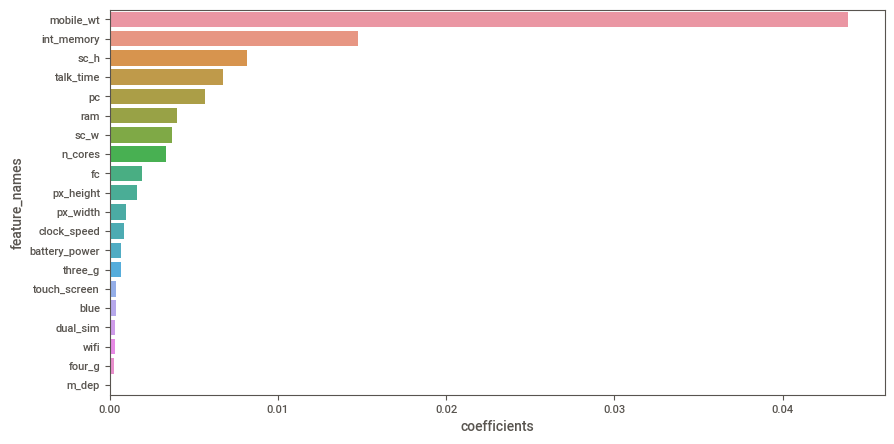

In [100]:
plt.figure(figsize=(10,5))
sns.barplot(y=feature_importance['feature_names'],x=feature_importance['coefficients'].sort_values())

### Using Decision Tree Algorithm

In [101]:
feature_names = data.columns.tolist()
feature_score = dtc.feature_importances_
f_name=[]
f_score_list=[]
for feature_name,f_score in zip(feature_names,feature_score):
    f_name.append(feature_name)
    f_score_list.append(abs(f_score))

In [102]:
feature_importance=pd.DataFrame({'feature_names':f_name,'importance':f_score_list})
feature_importance.sort_values(by=['importance'], ascending=False,inplace=True)

<Axes: xlabel='importance', ylabel='feature_names'>

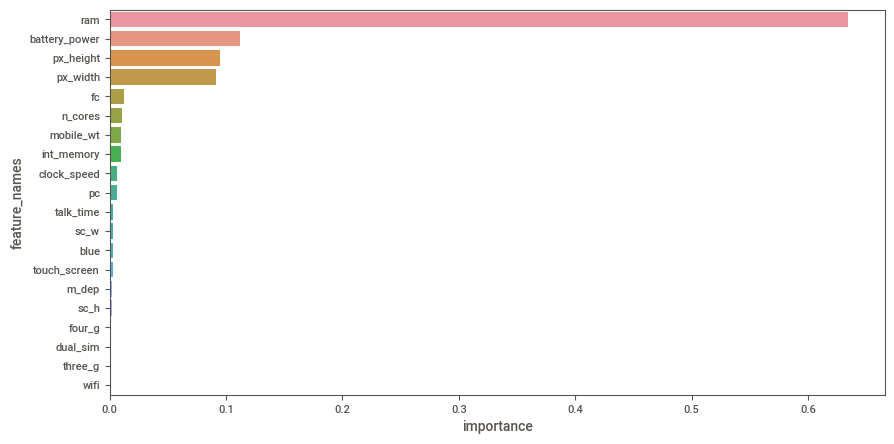

In [103]:
plt.figure(figsize=(10,5))
sns.barplot(y=feature_importance['feature_names'],x=feature_importance['importance'].sort_values())

### Using Random Forest Algorithm

In [104]:
feature_names = data.columns.tolist()
feature_score = rfc.feature_importances_
f_name=[]
f_score_list=[]
for feature_name,f_score in zip(feature_names,feature_score):
    f_name.append(feature_name)
    f_score_list.append(abs(f_score))

In [105]:
feature_importance=pd.DataFrame({'feature_names':f_name,'importance':f_score_list})
feature_importance.sort_values(by=['importance'], ascending=False,inplace=True)

<Axes: xlabel='importance', ylabel='feature_names'>

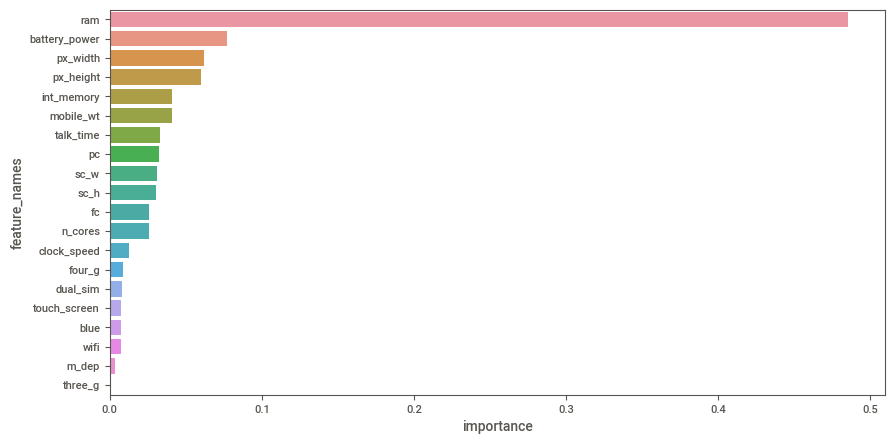

In [106]:
plt.figure(figsize=(10,5))
sns.barplot(y=feature_importance['feature_names'],x=feature_importance['importance'].sort_values())

### Using XGB Algorithm

In [107]:
feature_names = data.columns.tolist()
feature_score = xgb.feature_importances_
f_name=[]
f_score_list=[]
for feature_name,f_score in zip(feature_names,feature_score):
    f_name.append(feature_name)
    f_score_list.append(abs(f_score))

In [108]:
feature_importance=pd.DataFrame({'feature_names':f_name,'importance':f_score_list})
feature_importance.sort_values(by=['importance'], ascending=False,inplace=True)

<Axes: xlabel='importance', ylabel='feature_names'>

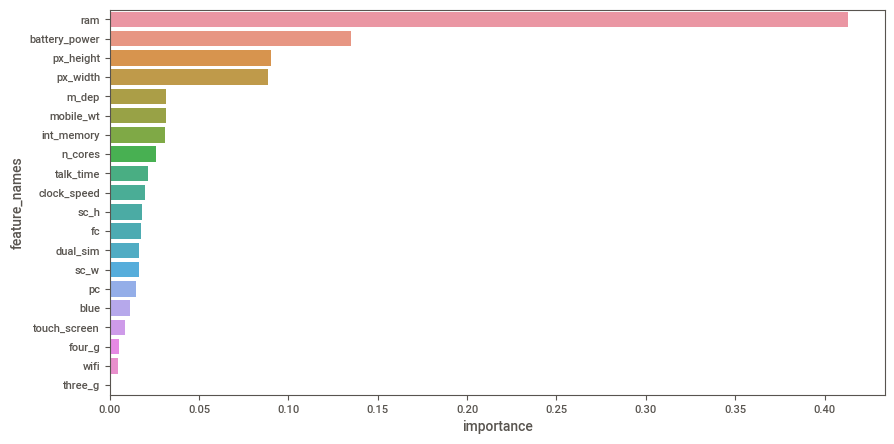

In [109]:
plt.figure(figsize=(10,5))
sns.barplot(y=feature_importance['feature_names'],x=feature_importance['importance'].sort_values())

### For all top algorithms ram, battery_power, px_height, px_width are strong features